In [328]:
import pandas as pd
import numpy as np
import os
import pickle
import datetime
from datetime import date
from datetime import datetime
from sklearn.model_selection import train_test_split
from itertools import combinations_with_replacement
from itertools import combinations
from itertools import permutations
from itertools import product 
import random
import csv
import matplotlib.mlab as mlab
import scipy.linalg as lng # linear algebra from scipy library
import matplotlib . pyplot as plt # library for plots
import matplotlib.animation as animation # lets animate the plots!
from matplotlib.pyplot import figure

In [295]:
# setting saving directory
today = date.today()
now = datetime.now()
print (today)
print (now)
dt_string = now.strftime("%d-%m-%Y_%H-%M-%S") #do not put : or similar 
print("date and time =", dt_string)	    
root = "C:/Users/arita/Documents/private/Data Engineering/2semestre/Stochastic_modeling/Project/data/outputs"

#saving function
def saveAsCSV(df,name,rootdir = root):
    """
    df = dataframe
    name = name for saving in format: 'thisisthename.csv'
    rootdir = local saving directory, default is root
    """
    dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
    savepath = rootdir +'/' + dt_string+'_'+ name 
    df.to_csv ( savepath, index = False, header=True)

#loading function
def loadCSV(name,rootdir = root):
    """
    rootdir = local saving directory, default is root
    name = exact name (including datetime and extention .csv)
    """
    loadpath = rootdir +'/'+ name 
    print ("loading: ",loadpath)
    df = pd.read_csv(loadpath)
    return df


2020-06-21
2020-06-21 14:01:18.881574
date and time = 21-06-2020_14-01-18


In [294]:
os.getcwd()

'C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm'

In [276]:
os.getcwd()
os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\tm')

In [278]:
#unpickle 3D matrix P_t previously saved
#with open('20-06-2020_14-19-49_P_t_senior.pkl','rb') as f:
    #P_t_senior = pickle.load(f)
    #print(P_t_senior.shape)
    
with open('21-06-2020_11-20-39_P_t_child.pkl','rb') as f:
    P_t_child = pickle.load(f)
    
with open( '21-06-2020_11-20-39_P_t_adult1.pkl','rb') as f:
    P_t_adult1 = pickle.load(f)

with open('21-06-2020_11-20-39_P_t_adult2.pkl','rb') as f:
    P_t_adult2 = pickle.load(f)

with open('21-06-2020_11-20-39_P_t_adult3.pkl','rb') as f:
    P_t_adult3 = pickle.load(f)

with open('21-06-2020_11-20-39_P_t_adult4.pkl','rb') as f:
    P_t_adult4 = pickle.load(f)

with open('21-06-2020_11-20-39_P_t_senior.pkl','rb') as f:
    P_t_senior = pickle.load(f)
    

In [279]:
#append all P_t in one vector
all_P_t = []
all_P_t.append(P_t_child)
all_P_t.append(P_t_adult1)
all_P_t.append(P_t_adult2)
all_P_t.append(P_t_adult3)
all_P_t.append(P_t_adult4)
all_P_t.append(P_t_senior)

In [280]:
#append all dataframes_labels in one vector

all_P_t_labels = []
all_P_t_labels.append('P_t_child')
all_P_t_labels.append('P_t_adult1')
all_P_t_labels.append('P_t_adult2')
all_P_t_labels.append('P_t_adult3')
all_P_t_labels.append('P_t_adult4')
all_P_t_labels.append('P_t_senior')

In [288]:
# lets look into them 
counter = 0
for P_t_i in all_P_t:
    t = random.randint(0,144)
    print ("%s at time %s" %(all_P_t_labels[counter],t))
    print (P_t_i[0])
    counter +=1


P_t_child at time 4
[[9.98841251e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.79374276e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.79374276e-04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0000

In [289]:
# support functions

def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

def printlist(list):
    c = 0
    for element in list:
        c +=1
        print (c,element)
        
def cartesian_product(arr1, arr2): 
    return list(product(arr1, arr2))

def splitstring(word): 
    return [char for char in word]

def keep1(arrayorint):
    """
    array = array of numbers
    """
    if (type(arrayorint) != int):
        new_list =[] 
        for num in arrayorint:
            first_digit = int(str(num)[:1]) 
            new_list.append(first_digit)
        new = np.array(new_list)
    else: 
        new = int(str(arrayorint)[:1]) 
    return new

def takeFirstNum(code):
    """
    works only if code is in string format!
    """
    code_list = splitstring(code)
    list_map = (map(int, code_list))
    list_of_integers  = []
    for num in list_map:
        list_of_integers.append(int(num))
        #print (num)
    x = list_of_integers[0]
    return x

def takeSecNum(code):
    """
    works only if code is in string format!
    """
    code_list = splitstring(code)
    list_map = (map(int, code_list))
    list_of_integers  = []
    for num in list_map:
        list_of_integers.append(int(num))
        #print (num)
    x = list_of_integers[1]
    return x

In [351]:
#main
def activity_forecast(transitionMatrix,activityToday = 0, days =1):
    
    # Choose the starting state
    # shall this be random? 
    #activityToday = random.choice(states_id1)
    
    # Or we choose the starting state as sleep? 
    #activityToday = 0 #num int
    
    #anyhow append in the activity list
    activityList = [activityToday]
    prob = 1
    period = days*144
    for day in range(days):
        for t in range(1,144):#zero is already appended!
            for current_state in states_id1: # we look for the activiy code in the array of possible states
                if activityToday != current_state:
                    continue
                else: # as soon as we 
                    #index = takeFirstNumOfCode(code) #no real need for this, me dumb
                    #print (sum(transitionMatrix[t][current_state]))
                    if (sum(transitionMatrix[t][current_state]) == 0):
                        #print (t,current_state)
                        activityToday = current_state
                        activityList.append(current_state)

                    else:
                        change = np.random.choice(transition_array[current_state],replace=True,p=transitionMatrix[t][current_state])
                        for transition in transitionName[current_state]:
                            if change != transition: #type string 
                                continue
                            else:
                                next_state = takeSecNum(change)
                                prob = prob * transitionMatrix[t][current_state][next_state]
                                activityToday = next_state
                                activityList.append(next_state)
                                break
                        break
   
    return activityList

def SimulateActivitiesForThisListoFPeople(list_of_P_t, numdays):
    """
    list_of_P_t : as input we have a list of people aka a list of transition matrices
                    this is eg to rapresent an household of two kids, two adults 30-45 and one adult >75
    numdays: how many days we want to get
    """
    familysize = len(list_of_P_t)
    print ("lets simulate a family of %i, for %i days" %(familysize,numdays))
    
    #container to get the activitylist of each family member
    container_activityLists = [[] for i in range(familysize)]
    
    for i in range(familysize):
        transitionMatrix = list_of_P_t[i]
        activityToday = 0
        
        #get the activities simulated according to the right transition Matrix
        activityList = ForecastAcitivtiesforNdays(transitionMatrix,i,activityToday, numdays)
        
        #add them to the container
        container_activityLists[i]= (activityList)
    
    return container_activityLists
    
def ForecastAcitivtiesforNdays(transitionMatrix,i = 0, activityToday = 0, days =1):
    #get the sim activity list
    #this list is 144*numdays
    activityList = activity_forecast(transitionMatrix,activityToday,days)
    #print (type(activityList))
    
    #save it proper <----------------------NEED TO MAKE THIS WORK
    savelabel ='SimActivities_'+all_P_t_labels[i]+'_NumOfDays_'+str(days)+".csv"
    #saveAsCSV(activityList,savelabel)
    #with open(savelabel, "w",newline="") as csvfile:
        #writer = csv.writer(csvfile)
        #writer.writerows(activityList)
    
    #plot it
    figure(figsize=(days*7,8))
    T = np.arange(len(activityList))
    
    plt.plot(T, activityList)
    plt.title('%s'%(all_P_t_labels[i]))
    plt.xlabel('time')
    plt.ylabel('activities')

    plt.xticks(np.arange(min(T), max(T)+1, 143))
    plt.yticks(np.arange(min(activityList), max(activityList), 1))
    plt.grid(axis='activityList', linestyle='-')
    return activityList

In [291]:
# the statespace
states_id1 = [0,1,2,3,4,5,6,7,8,9]
states_id2 = [0,1,2,3,4,5,6,7,8,9] #10 possible unique activties 
states = ["PERSONAL CARE","EMPLOYMENT","STUDY","HOUSEHOLD AND FAMILY CARE","VOLUNTEER WORK AND MEETING","SOCIAL LIFE AND ENTERTAINMENT","SPORTS AND OUTDOOR ACTIVITIES","HOBBIES, GAMES, AND COMPUTING","MASS MEDIA","TRAVEL AND UNSPECIFIED TIME USE"]

# all possibile sequences of couples of activities
# the activity can be the same before and after so (0,0) (1,1) are acceptable combinations
transitionCodes =cartesian_product(states_id1,states_id2)
transitionCoordinates = []
transitionName = [[],[],[],[],[],[],[],[],[],[]] #ten subarrays

allchunks = chunks(transitionCodes, len(states))

counter= 0
for item in allchunks:
    #print("transitionCoordinates[%i]: %s"%(counter,item))
    transitionCoordinates.append(item)
    counter += 1
    
counter= 0
for j in range(10):
    for k in range(10):
        d = transitionCoordinates[j][k][0] # decine, left element (d,)
        u = transitionCoordinates[j][k][1] # units, right element ,u)
        tot = ('%i%i'%(d,u))
        #print (counter,tot)
        transitionName[counter].append(tot)
    counter += 1
print ((transitionName[0]))
transition_array = np.array(transitionName)


['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']


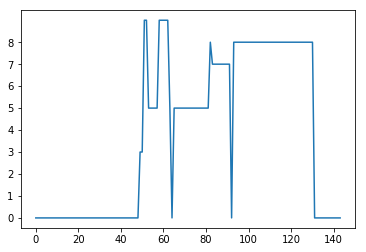

In [352]:
# SIMULATE ONE DAY
# note: at time it returns error because the sum of the row of P_t[t given] [j initial state] is not 1. 
# this shouldnt be possible. there must always be one state to move to (at least the same state!)
# how to catch why some lines at t = 0 are all zeros? 
transitionMatrix = P_t_senior
activityList = activity_forecast(transitionMatrix,0)
T = np.arange(144)
plt.plot(T, activityList)
plt.yticks(np.arange(min(activityList), max(activityList), 1))
plt.grid(axis='activityList', linestyle='-')

https://stackoverflow.com/questions/46539431/np-random-choice-probabilities-do-not-sum-to-1
This is a known numpy bug.


In [271]:
#transitionMatrix[86][4] 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [362]:
#SIMULATE MANY DAYS
# To save every activityList
list_activity = []
count = 0

# lets simulate one year
for iterations in range(0,8):
        list_activity.append(activity_forecast(transitionMatrix,0))

# Check out all the `activityList` we collected    
#print(list_activity)

# Iterate through the list to get a count of all activities ending in state:'Run'
for smaller_list in list_activity:
    if(smaller_list[2] == 0):
        count += 1

# Calculate the probability of starting from state:'Sleep' and ending at state:'Run'
percentage = (count/10000) * 100
print("The probability of starting at state:0 and ending at state: 0'= " + str(percentage) + "%")

The probability of starting at state:0 and ending at state: 0'= 0.08%


In [363]:
len(list_activity)

8

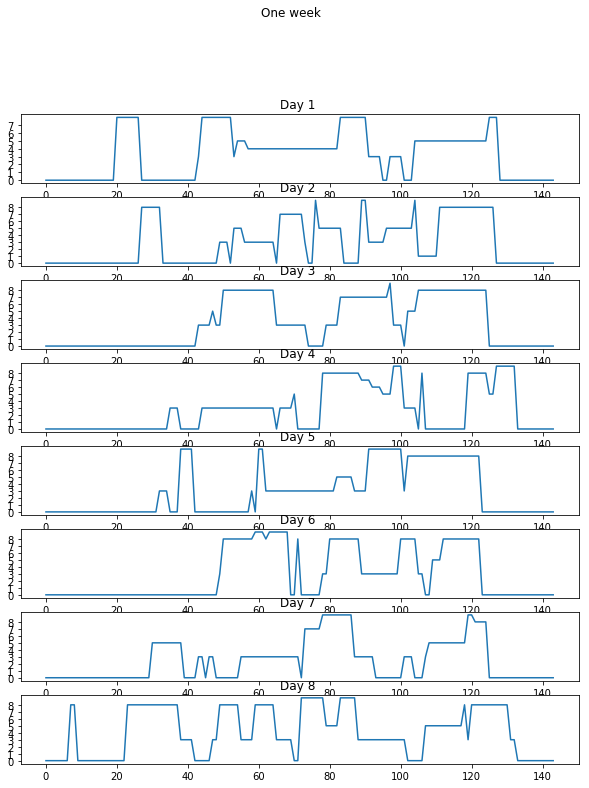

In [364]:
fig = plt.figure(figsize=(10, 15))
fig.suptitle('One week')

counter = 1
for activityList in list_activity: 
    ax =  fig.add_subplot(10,1,counter)
    ax.set_title('Day %i '%counter)
    T = np.arange(144)
    plt.plot(T, activityList)
    plt.yticks(np.arange(min(activityList), max(activityList), 1))
    plt.grid(axis='activityList', linestyle='-')
    counter +=1

In [348]:
os.getcwd()
os.chdir('C:\\Users\\arita\\Documents\\GitHub\\02443-SimSolarEnergy\\code\\activityLists')

lets simulate a family of 5, for 7 days


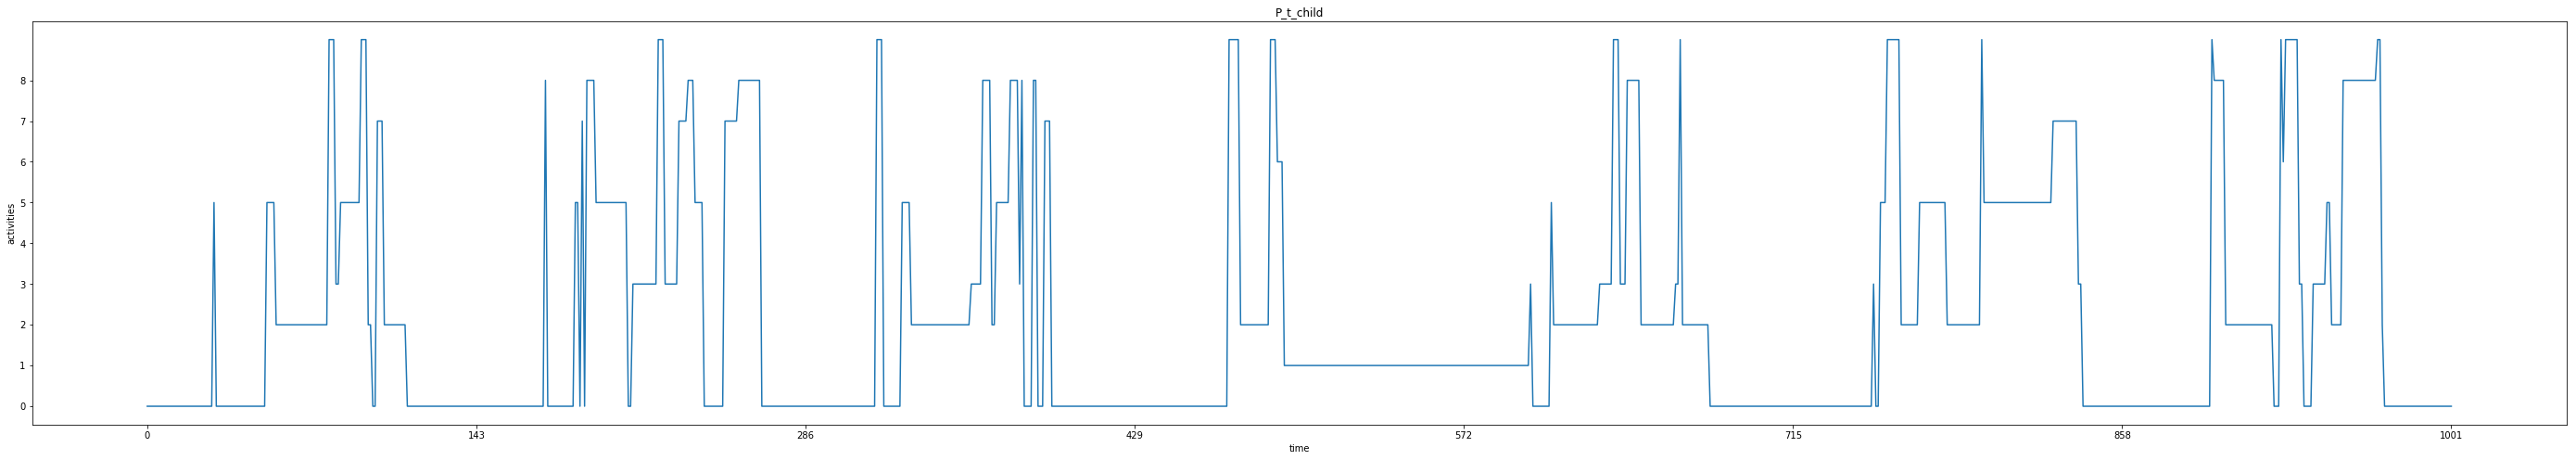

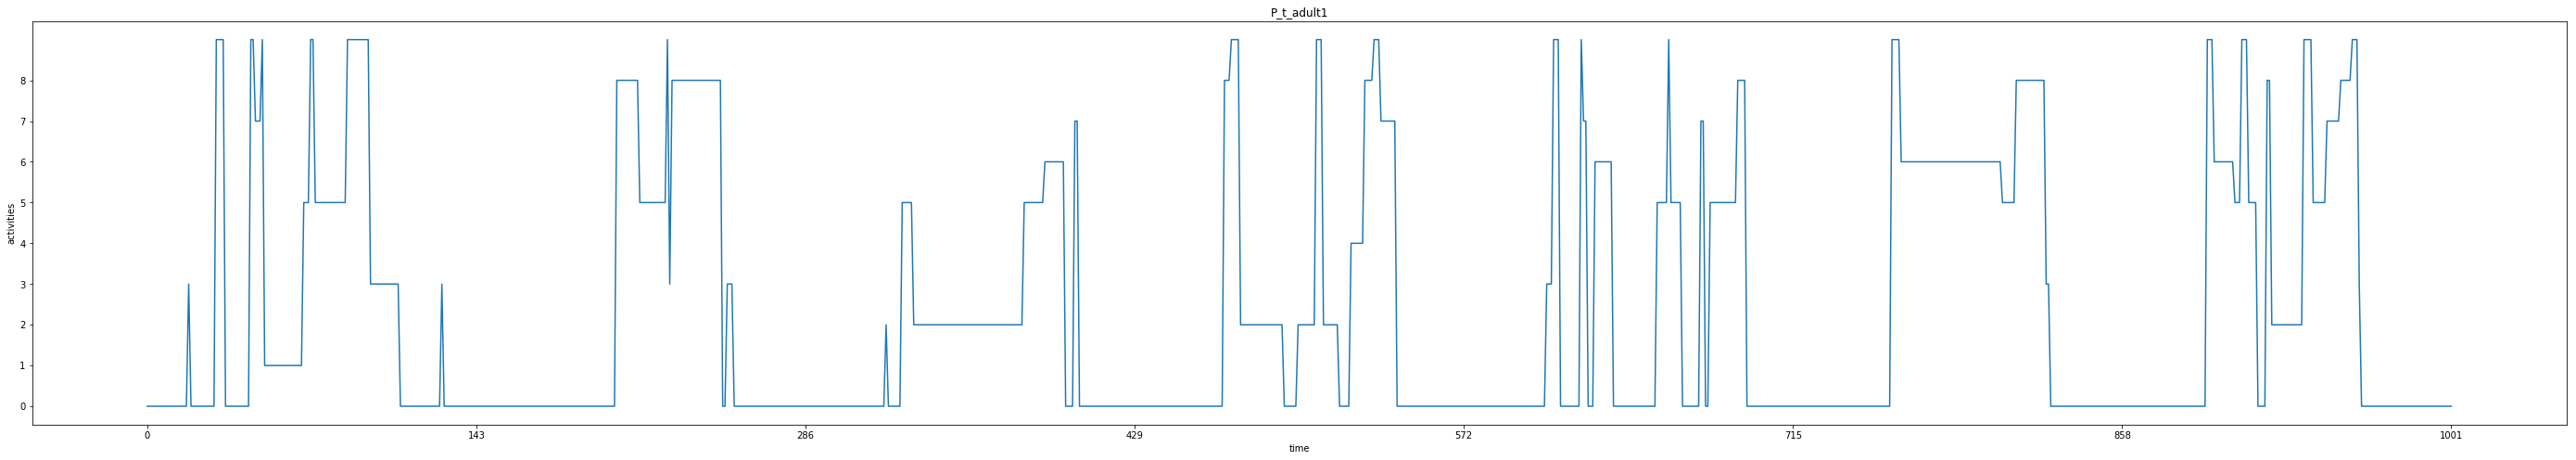

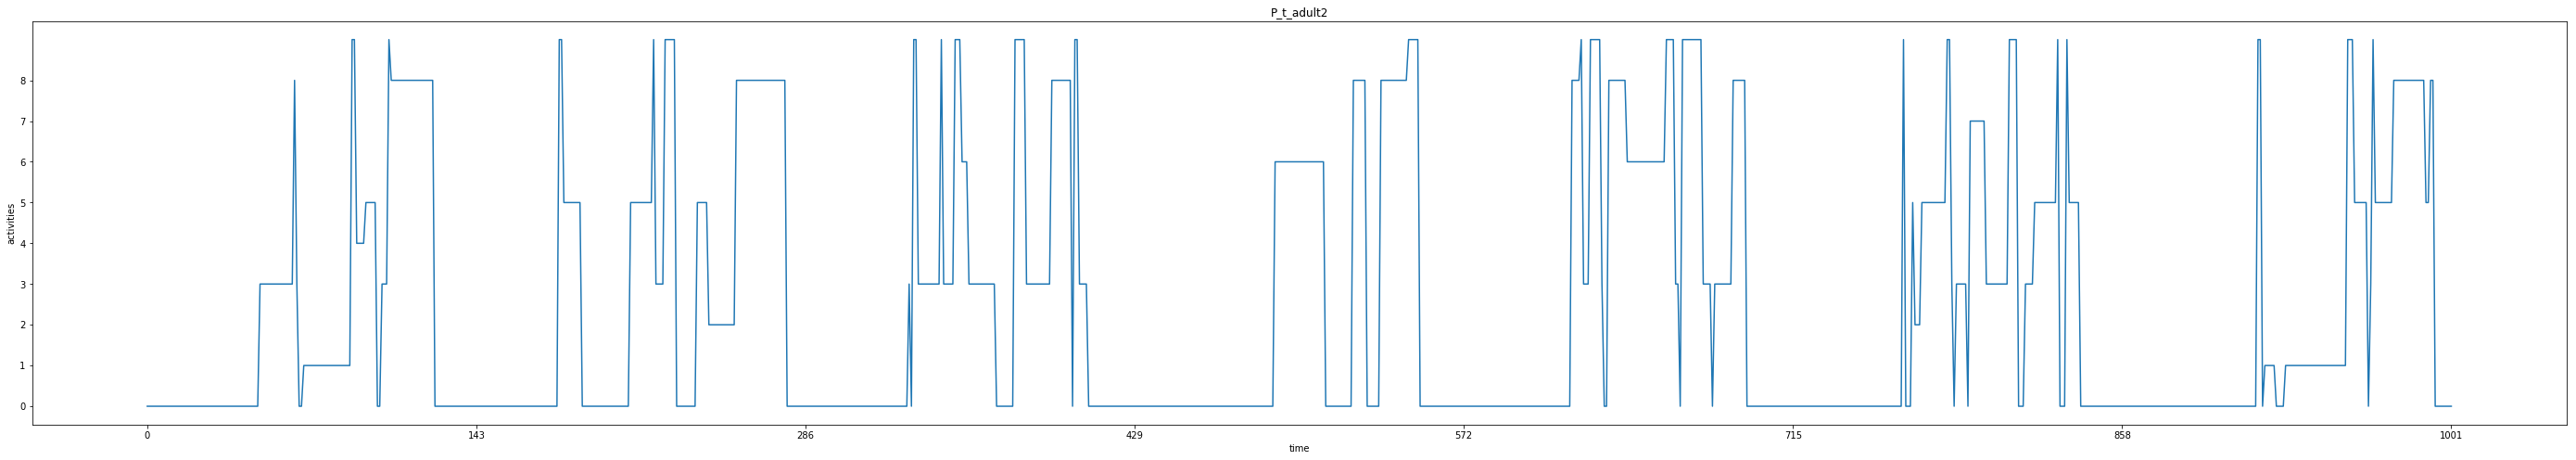

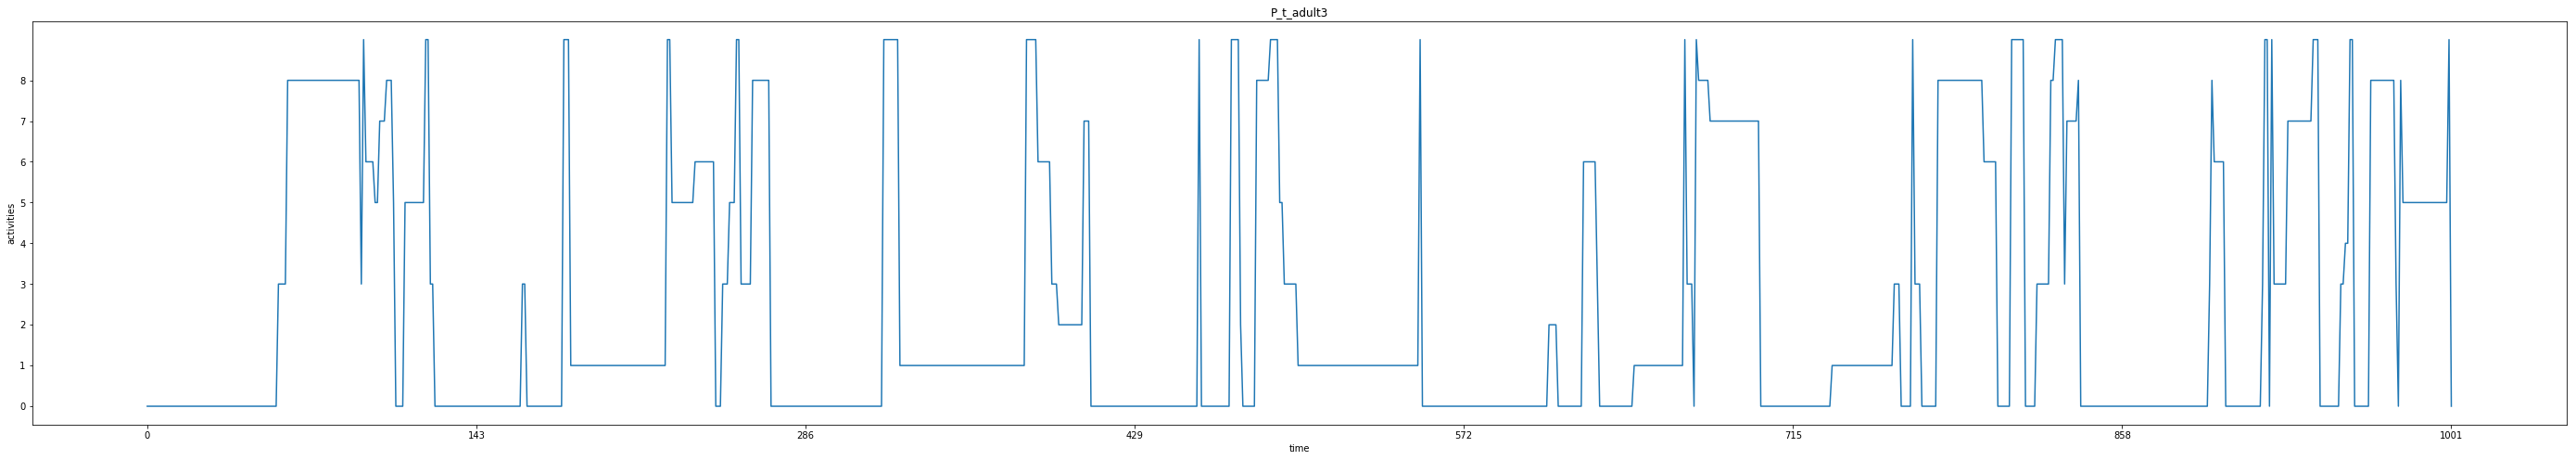

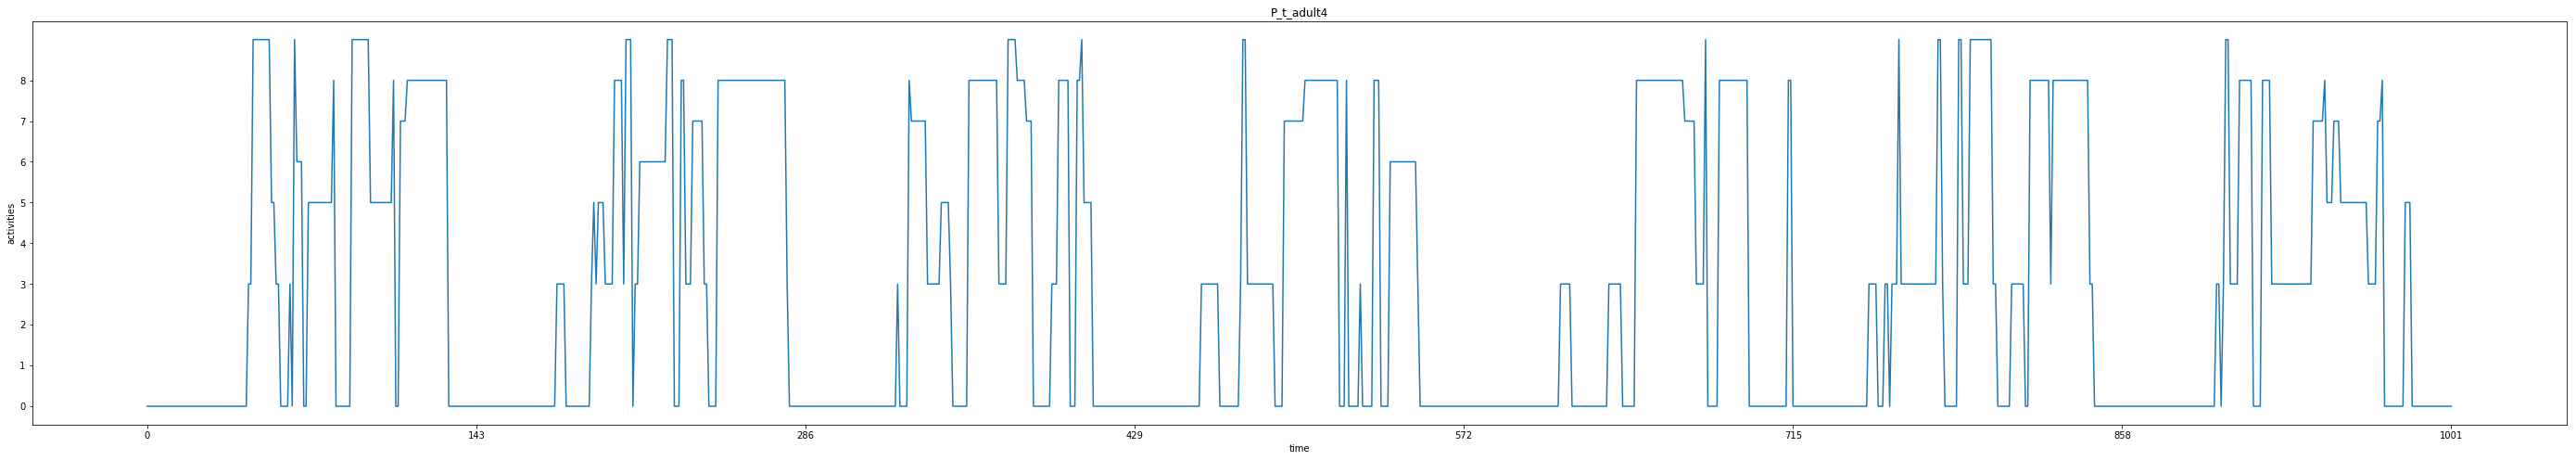

In [365]:
#SIMULATE A FAMILY OF PEOPLE FOR N DAYS 
list_of_people = []
list_of_people.append(P_t_child)
list_of_people.append(P_t_child)
list_of_people.append(P_t_adult1)
list_of_people.append(P_t_adult1)
list_of_people.append(P_t_senior)

days = 7

container_activityLists = SimulateActivitiesForThisListoFPeople(list_of_people,days)

dt_string = now.strftime("%d-%m-%Y_%H-%M-%S")
savelabel ='SimActivities_'+str(len(list_of_people))+'_People_'+'_NumOfDays_'+str(days)+".csv"
with open( savelabel,'wb') as f:
    pickle.dump(container_activityLists, f)